In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import dataframe and display the first 5 lines
df = pd.read_csv("./data/dataset.csv")
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [4]:
# Get the shape of out dataframe => Our dataset has 1000 row and 9 columns
df.shape

(1000, 9)

In [5]:
# To get statistics about our dataframe count, mean, std, min, max and more
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [6]:
# To get more information about our dataset => types and non-null values for each column
# From what df.info displayed we have 3 types => int64, float64 and object
df.info()

# For Weather, Traffic_level, Time_of_Dat and Courier_Experience_year has null values => 30 values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [7]:
# As I mentioned from the previous results we have missing data in this columns ['Weather', 'Traffic_level', 'Time_of_Dat', 'Courier_Experience_year']
# 30 values for each columns
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [8]:
# We check for duplicated columns => 0 duplicated
df.duplicated().sum()

np.int64(0)

In [9]:
# To check the frequency of each unique value in the categorical columns
columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
for column in columns:
  print(df[column].value_counts())

Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64
Traffic_Level
Medium    390
Low       383
High      197
Name: count, dtype: int64
Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64
Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64


In [10]:
# From the last results the most occurring class are:
# Weather => Clear    470
# Traffic_Level => Medium    390
# Time_of_Day => Morning      308
# Vehicle_Type => Bike       503

df["Weather"] = df["Weather"].fillna("Clear")
df["Traffic_Level"] = df["Traffic_Level"].fillna("Medium")
df["Time_of_Day"] = df["Time_of_Day"].fillna("Morning")
df["Vehicle_Type"] = df["Vehicle_Type"].fillna("Bike")

df["Courier_Experience_yrs"] = df["Courier_Experience_yrs"].fillna(df["Courier_Experience_yrs"].mean())


df.isnull().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

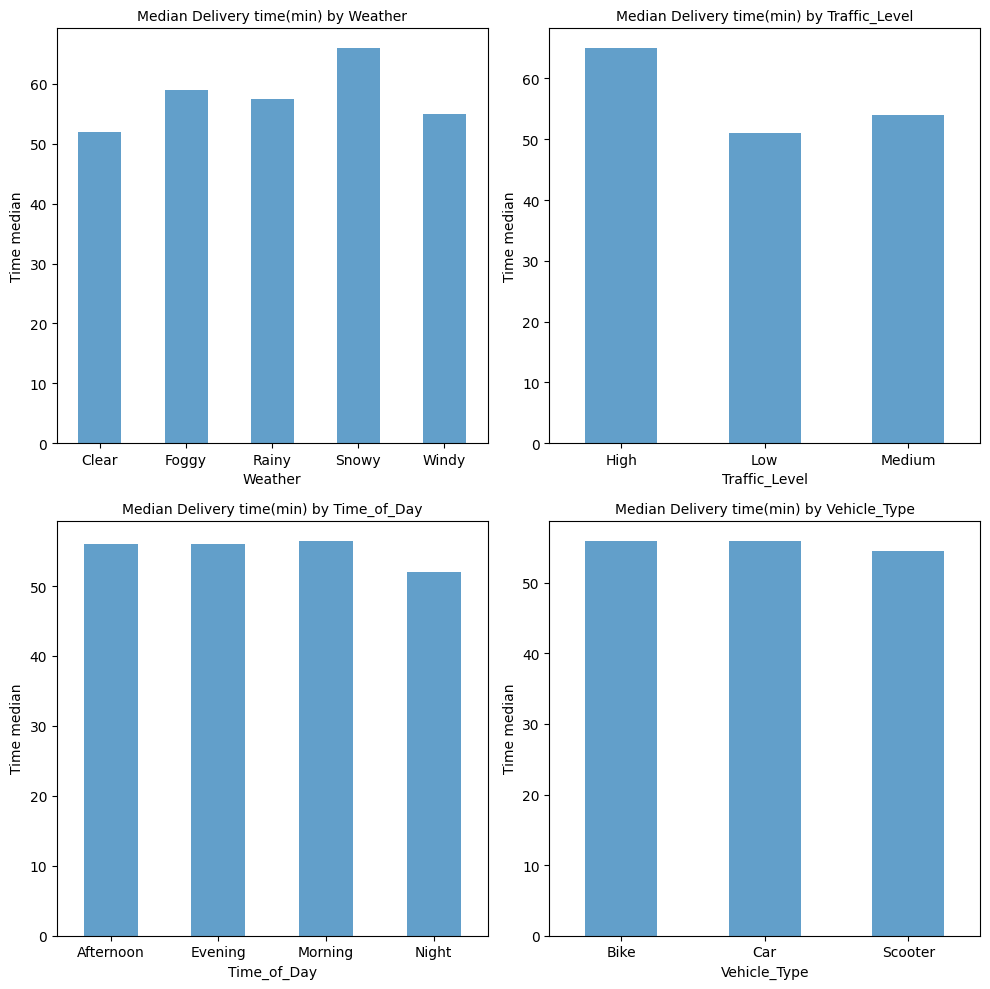

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

_, axes = plt.subplots(2, 2, figsize=(10, 10))
for i in range(len(columns)):
  row = i // 2
  col = i % 2
  column = columns[i]

  df.groupby(column)['Delivery_Time_min'].median().plot(kind='bar', stacked=False, ax=axes[row, col], alpha=0.7)
  axes[row, col].set_title(f'Median Delivery time(min) by {column}', fontsize=10)
  axes[row, col].set_xlabel(column, fontsize=10)
  axes[row, col].set_ylabel('Time median', fontsize=10)

  axes[row, col].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


# From the graphs we can see that the Time_of_the_day and vehicle_type are not affecting our target

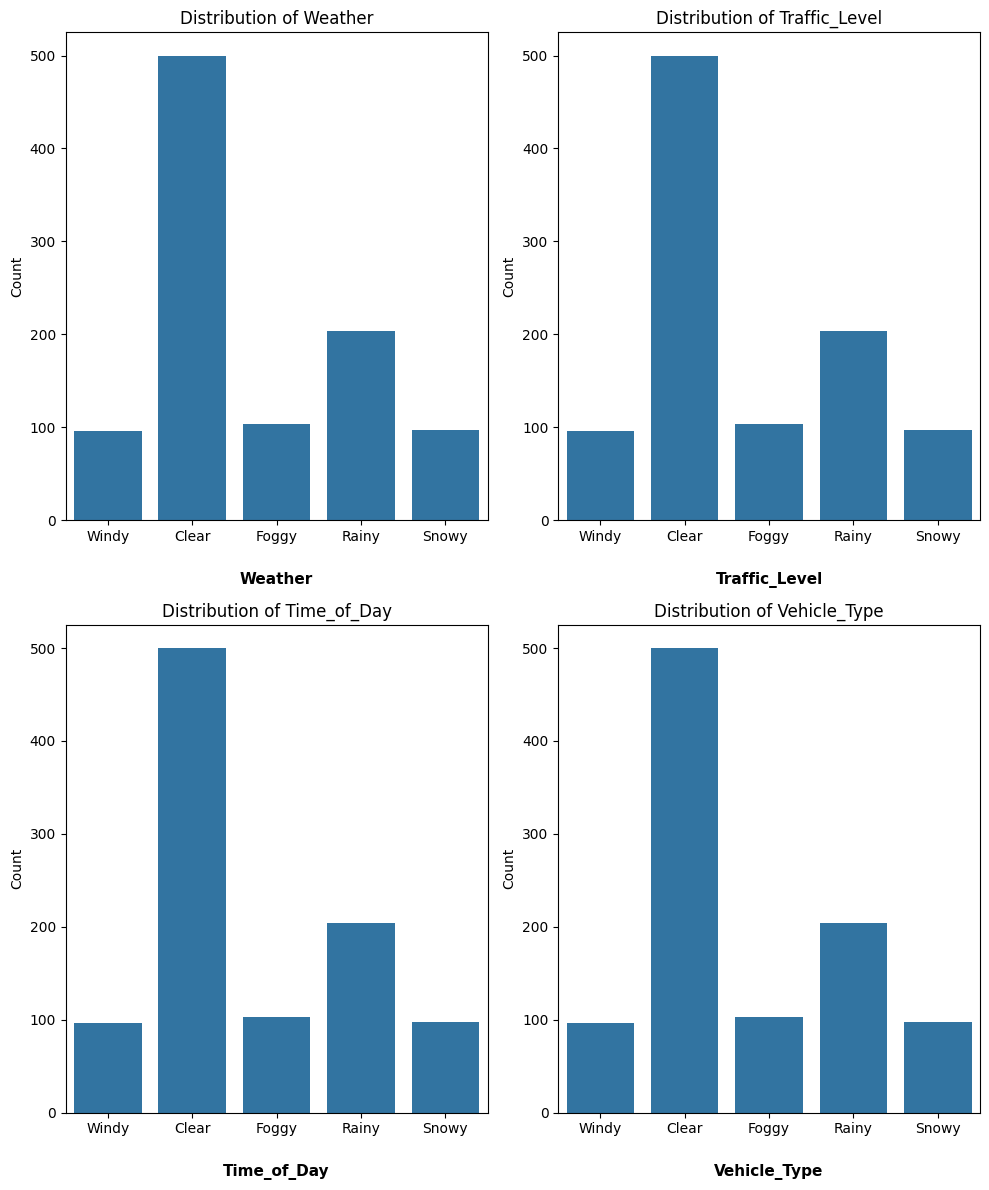

In [12]:

columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
target = 'Delivery_Time_min'
categorical_features = df[columns + [target]]

fig, axes = plt.subplots(2, 2, figsize=(10, 12))

for i in range(len(columns)):
    row = i // 2
    col = i % 2
    column = columns[i]

    sns.countplot(x='Weather', data=df, ax=axes[row, col])

    axes[row, col].set_title(f'Distribution of {column}', fontsize=12)
    axes[row, col].set_xlabel(column, fontsize=11, fontweight='bold', labelpad=20)
    axes[row, col].set_ylabel("Count", fontsize=10)
    axes[row, col].tick_params(axis='x')

plt.tight_layout()
plt.show()

### Correlation Matrix

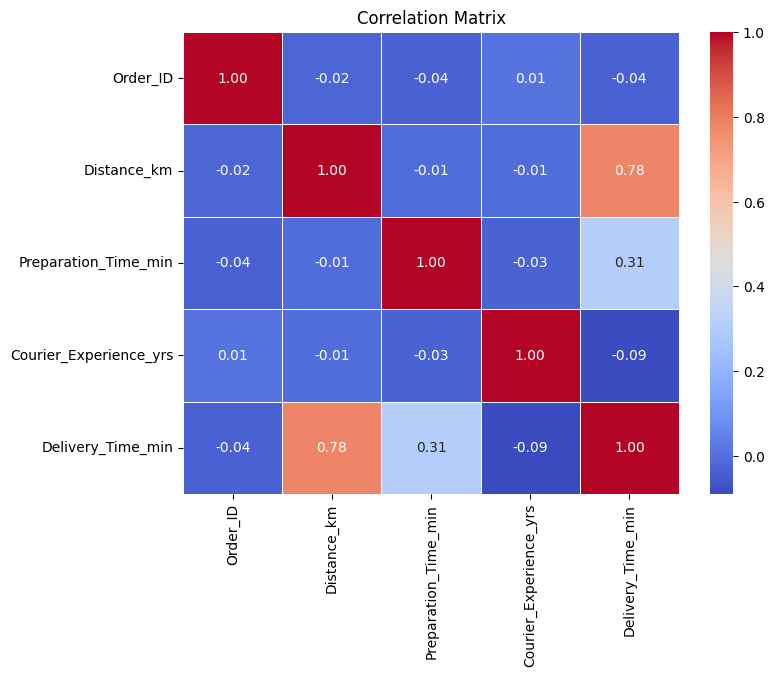

In [13]:
numerical_features = df[["Order_ID","Distance_km","Preparation_Time_min",	"Courier_Experience_yrs",	"Delivery_Time_min"]]
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# From the correlation matrix we can see that that delivery_time is related of affected more by DIstance_km and preparation_time_min 

In [14]:
columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
categorical_features = df[columns]
categorical_features

,Weather,Traffic_Level,Time_of_Day,Vehicle_Type
0,Windy,Low,Afternoon,Scooter
1,Clear,Medium,Evening,Bike
2,Foggy,Low,Night,Scooter
3,Rainy,Medium,Afternoon,Scooter
4,Clear,Low,Morning,Bike
...,...,...,...,...
995,Clear,High,Evening,Car
996,Rainy,Low,Morning,Scooter
997,Snowy,High,Evening,Scooter
998,Clear,Low,Afternoon,Bike


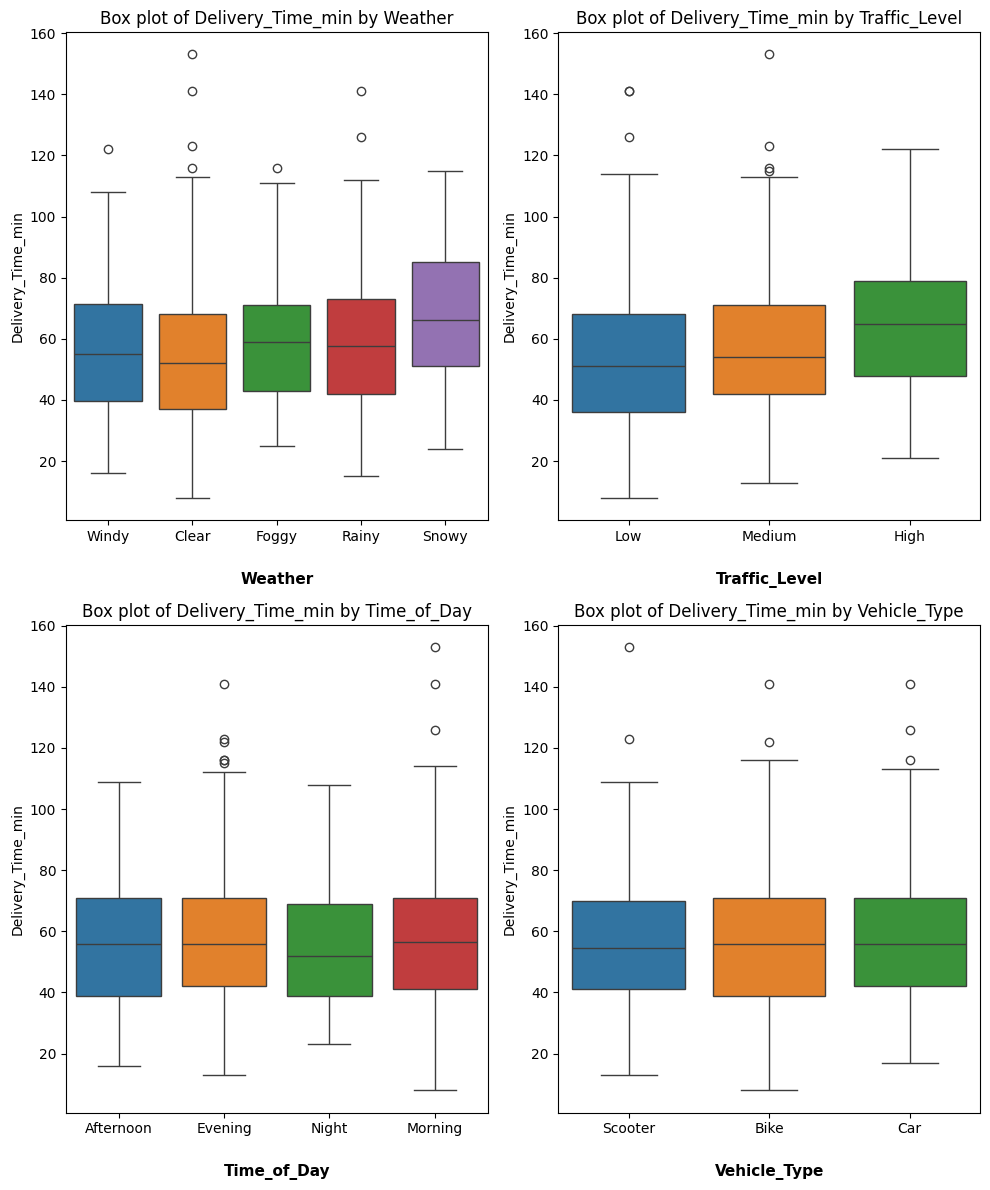

In [15]:
columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
target = 'Delivery_Time_min'
categorical_features = df[columns + [target]]

fig, axes = plt.subplots(2, 2, figsize=(10, 12))

for i in range(len(columns)):
    row = i // 2
    col = i % 2
    column = columns[i]

    sns.boxplot(
        x=column,
        y=target,
        data=categorical_features,
        hue=column,
        ax=axes[row, col], 
    )

    axes[row, col].set_title(f'Box plot of {target} by {column}', fontsize=12)
    axes[row, col].set_xlabel(column, fontsize=11, fontweight='bold', labelpad=20)
    axes[row, col].set_ylabel(target, fontsize=10)
    axes[row, col].tick_params(axis='x')

plt.tight_layout()
plt.show()

# |---[----|=====|----]---|     o   o
# min   Q1   Q2   Q3  max    outliers



Text(0, 0.5, 'Count')

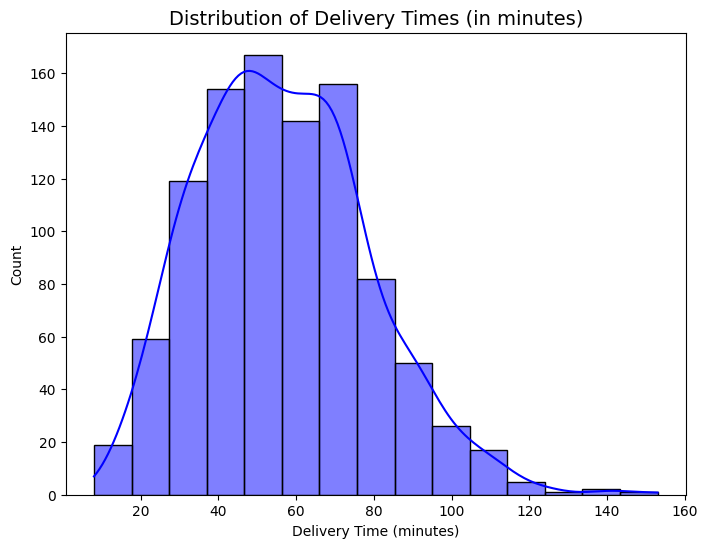

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Delivery_Time_min'], kde=True, bins=15, color='blue', edgecolor='black')
plt.title('Distribution of Delivery Times (in minutes)', fontsize=14)
plt.xlabel('Delivery Time (minutes)', fontsize=10)
plt.ylabel('Count', fontsize=10)

In [17]:
from sklearn.model_selection import train_test_split
df_copy = df.copy()

categorical_features_df = df_copy[["Weather", "Traffic_Level"]]
numerical_features_df = df_copy[["Distance_km", "Preparation_Time_min"]]
target = df_copy["Delivery_Time_min"]

data_prepared = pd.concat(
    [categorical_features_df, numerical_features_df, target],
    axis=1
)

data_prepared = data_prepared.dropna(subset=["Delivery_Time_min"])

X = data_prepared.drop(columns=["Delivery_Time_min"])
y = data_prepared["Delivery_Time_min"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y.head()


0    43
1    84
2    59
3    37
4    68
Name: Delivery_Time_min, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR

numerical_features = ["Distance_km", "Preparation_Time_min"]
categorical_features = ["Weather", "Traffic_Level"]

numeric_transformer = Pipeline(steps=[
  ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
  ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
  transformers=[
    ("num", numeric_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)
  ])

rfr_model = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('feature_selection', SelectKBest(score_func=f_regression, k=5)),
  ('regressor',  RandomForestRegressor(random_state=42))
]) 

svr_model = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('feature_selection', SelectKBest(score_func=f_regression, k=5)),
  ('regressor',  SVR(random_state=42))
])

rfr_model.fit(X_train, y_train)
y_predict = rfr_model.predict(X_test)


mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"R²:   {r2:.4f}")

MAE:  7.62
MSE:  113.98
R²:   0.7457


In [26]:
from sklearn.model_selection import GridSearchCV

param_grid_rfr = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'feature_selection__k': [5, 10, 'all']
}

grid_search_rfr = GridSearchCV(rfr_model, param_grid=param_grid_rfr, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')

grid_search_rfr.fit(X_train, y_train)
best_model = grid_search_rfr.best_estimator_
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Best Hyperparameters:", grid_search_rfr.best_params_)

print(f"Optimized MAE: {mae_best:.2f}")
print(f"Optimized MSE: {mse_best:.2f}")
print(f"Optimized R²: {r2_best:.4f}")

Best Hyperparameters: {'feature_selection__k': 10, 'regressor__max_depth': 10, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}
Optimized MAE: 6.89
Optimized MSE: 95.65
Optimized R²: 0.7866
